In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
from datetime import datetime, timedelta
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [2]:
 # Define the list of currency pairs
currency_pairs = ["EURUSD=X"]


#  aInitializen empty list to store individual DataFrames
dfs = []

# Fetching historical FOREX data for each currency pair and adding pair column
for pair in currency_pairs:
    data = yf.download(pair, start="2013-01-01", end="2023-12-31")
    
    # Add a column indicating the currency pair
    data['Pair'] = pair
    
    # Append the DataFrame to the list
    dfs.append(data)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(dfs)

# Displaying the combined data
print(df)

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close  Volume  \
Date                                                                    
2013-01-01  1.320132  1.322401  1.319592  1.320132   1.320132       0   
2013-01-02  1.319784  1.329805  1.319435  1.319784   1.319784       0   
2013-01-03  1.318392  1.318913  1.308900  1.318218   1.318218       0   
2013-01-04  1.303101  1.306380  1.300052  1.303271   1.303271       0   
2013-01-07  1.306848  1.309929  1.302060  1.306745   1.306745       0   
...              ...       ...       ...       ...        ...     ...   
2023-12-25  1.102657  1.104240  1.099989  1.102657   1.102657       0   
2023-12-26  1.102026  1.103997  1.100958  1.102026   1.102026       0   
2023-12-27  1.104301  1.112248  1.102925  1.104301   1.104301       0   
2023-12-28  1.110864  1.113945  1.107101  1.110864   1.110864       0   
2023-12-29  1.106819  1.108647  1.104326  1.106819   1.106819       0   

                Pair  
Date                  
2013

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.insert(0, "Date", df.index, True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pair
0,2013-01-01,1.320132,1.322401,1.319592,1.320132,1.320132,0,EURUSD=X
1,2013-01-02,1.319784,1.329805,1.319435,1.319784,1.319784,0,EURUSD=X
2,2013-01-03,1.318392,1.318913,1.308900,1.318218,1.318218,0,EURUSD=X
3,2013-01-04,1.303101,1.306380,1.300052,1.303271,1.303271,0,EURUSD=X
4,2013-01-07,1.306848,1.309929,1.302060,1.306745,1.306745,0,EURUSD=X


In [6]:
groupby1= df.groupby('Date')['Open'].sum().reset_index()

In [7]:
groupby1['Date'] = pd.to_datetime(groupby1['Date'])
groupby1.set_index('Date', inplace=True)
groupby1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2865, freq=None)

In [8]:
groupby1.head()

,Open
Date,
2013-01-01,1.320132
2013-01-02,1.319784
2013-01-03,1.318392
2013-01-04,1.303101
2013-01-07,1.306848


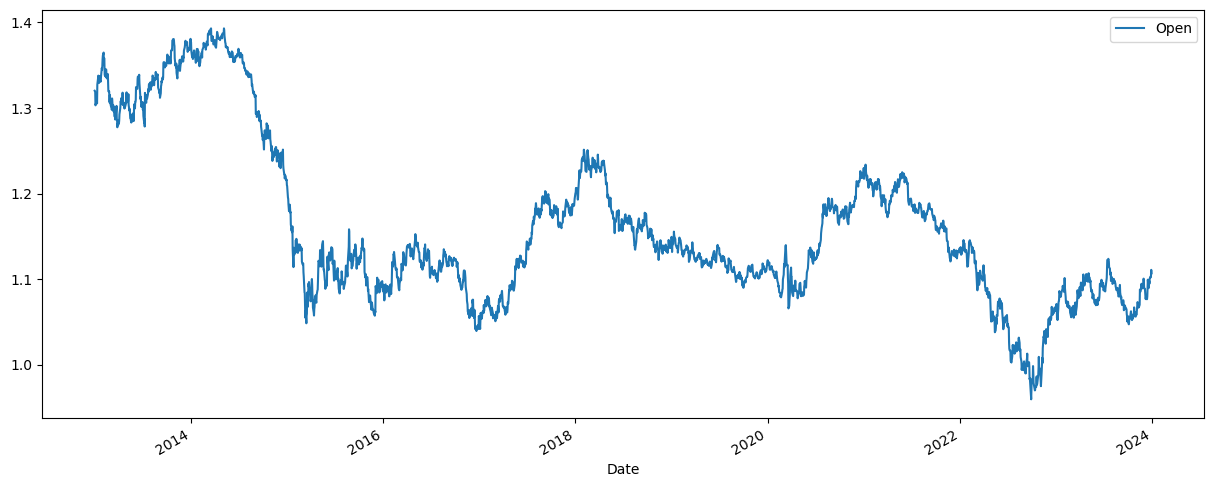

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
groupby1.plot(figsize=(15, 6))
plt.show()

In [10]:
groupby2 = df.groupby('Date')['Close'].sum().reset_index()

In [11]:
groupby2['Date'] = pd.to_datetime(groupby2['Date'])
groupby2.set_index('Date', inplace=True)
groupby2.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2865, freq=None)

In [12]:
groupby2.head()

,Close
Date,
2013-01-01,1.320132
2013-01-02,1.319784
2013-01-03,1.318218
2013-01-04,1.303271
2013-01-07,1.306745


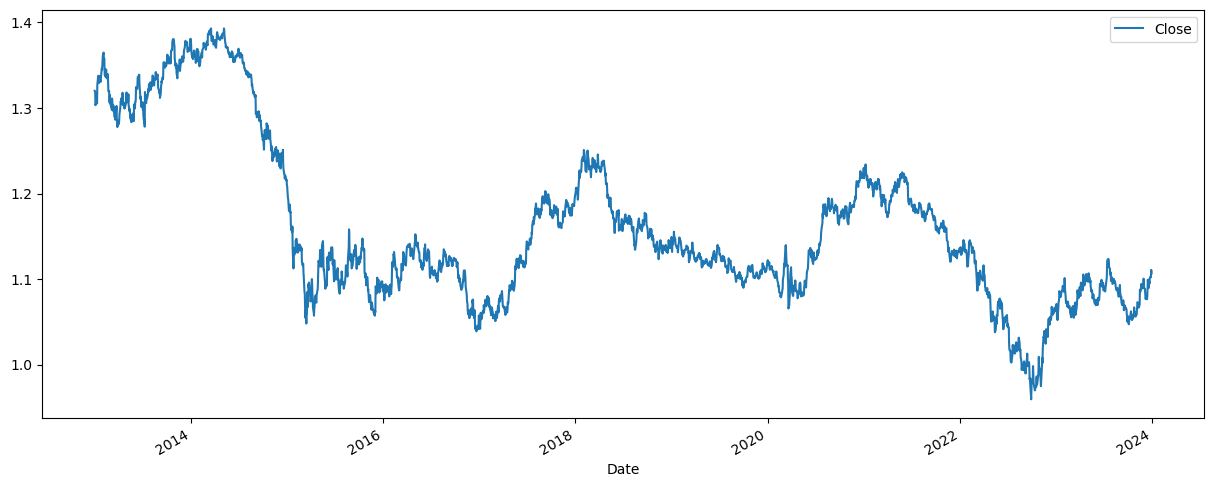

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
groupby2.plot(figsize=(15, 6))
plt.show()

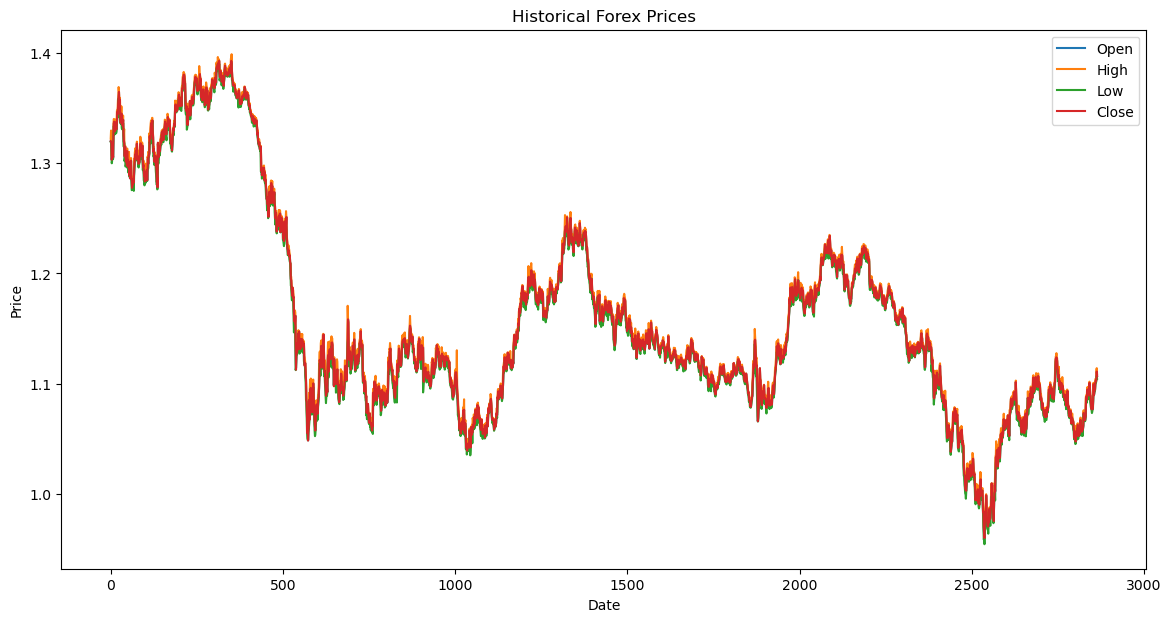

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(df['Open'], label='Open')
plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')
plt.plot(df['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Forex Prices')
plt.legend()
plt.show()

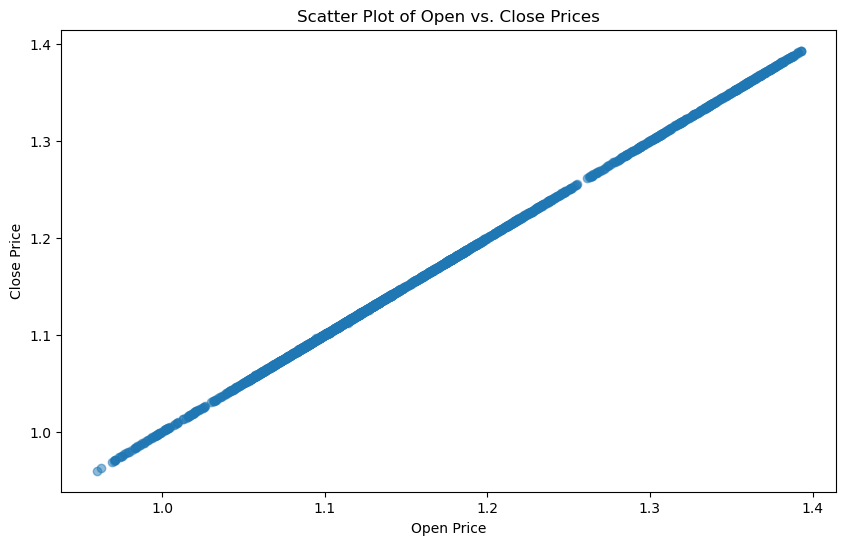

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], alpha=0.5)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Open vs. Close Prices')
plt.show()

In [16]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

C:\Users\Gayatri\AppData\Local\Temp\ipykernel_10348\1094794595.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Open', ci=None, marker='o', label='Open Price')
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


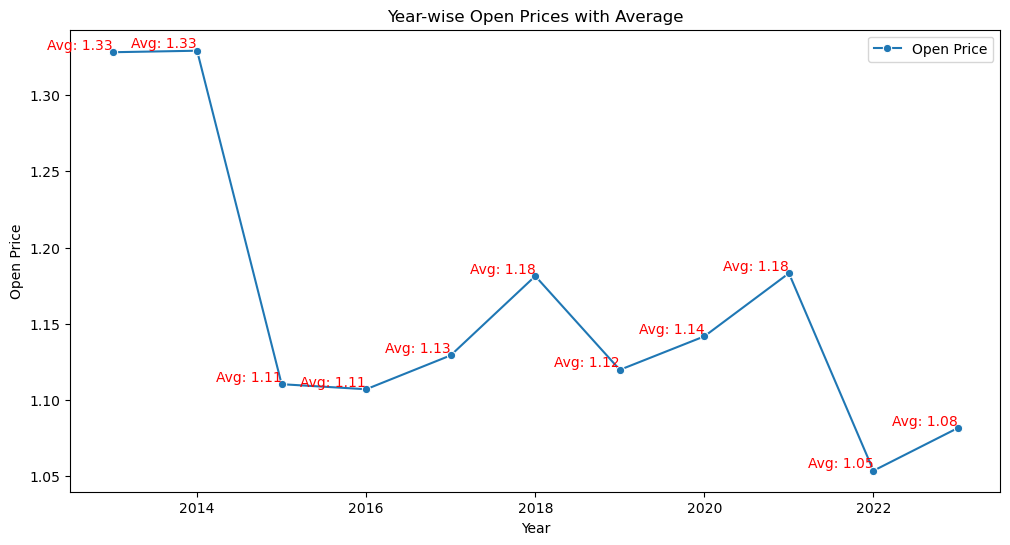

In [17]:
import seaborn as sns 
# Calculate average Open price for each year
average_open_prices = df.groupby('Year')['Open'].mean().reset_index()

# Line chart with average values shown for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Open', ci=None, marker='o', label='Open Price')

# Annotate average value for each year
for index, row in average_open_prices.iterrows():
    plt.text(row['Year'], row['Open'], f'Avg: {round(row["Open"], 2)}', ha='right', va='bottom', color='r')

plt.title('Year-wise Open Prices with Average')
plt.xlabel('Year')
plt.ylabel('Open Price')
plt.legend()
plt.show()



C:\Users\Gayatri\AppData\Local\Temp\ipykernel_10348\1743673089.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Open', ci=None, label='Open')
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayatri\AppData\Local\Temp\ipykernel_10348\1743673089.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='High', ci=None, label='High')
E:\Anaconda\Lib\site-packages\seabo

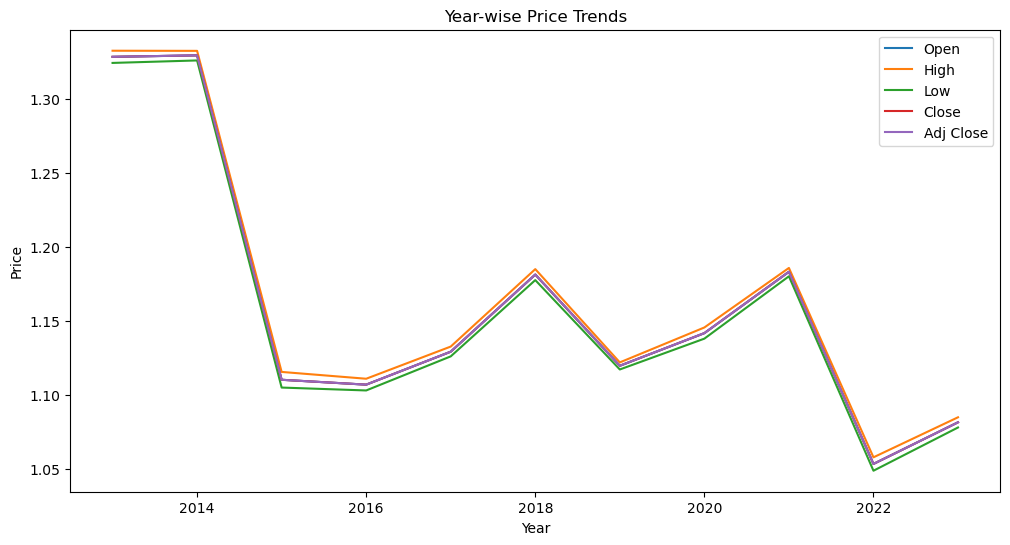

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'df' DataFrame me 'Year' column banana
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Line chart bana kar dikhaao
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Open', ci=None, label='Open')
sns.lineplot(data=df, x='Year', y='High', ci=None, label='High')
sns.lineplot(data=df, x='Year', y='Low', ci=None, label='Low')
sns.lineplot(data=df, x='Year', y='Close', ci=None, label='Close')
sns.lineplot(data=df, x='Year', y='Adj Close', ci=None, label='Adj Close')
plt.title('Year-wise Price Trends')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


In [19]:
# Calculate daily volatility (high - low) for each pair
df['Volatility'] = df['High'] - df['Low']


In [20]:
pip install ta

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import ta
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()


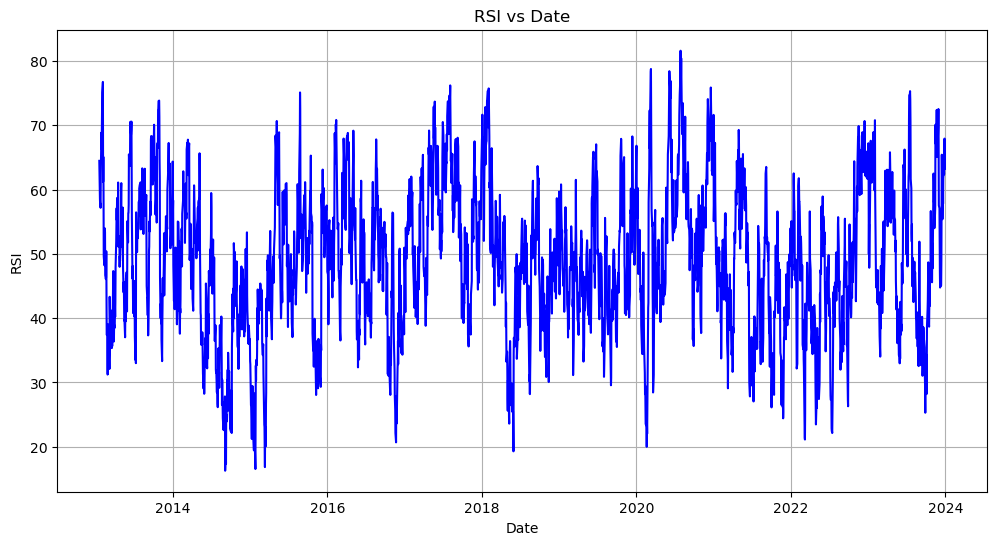

In [22]:
# Assuming df is your DataFrame with columns 'Date' and 'RSI'
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['RSI'], color='b', linestyle='-')
plt.title('RSI vs Date')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)
plt.show()

In [23]:
df.RSI=df.RSI.fillna(df.RSI.mean())

In [24]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Pair,Year,Volatility,RSI
0,2013-01-01,1.320132,1.322401,1.319592,1.320132,1.320132,0,EURUSD=X,2013,0.002809,48.902772
1,2013-01-02,1.319784,1.329805,1.319435,1.319784,1.319784,0,EURUSD=X,2013,0.010370,48.902772
2,2013-01-03,1.318392,1.318913,1.308900,1.318218,1.318218,0,EURUSD=X,2013,0.010013,48.902772
3,2013-01-04,1.303101,1.306380,1.300052,1.303271,1.303271,0,EURUSD=X,2013,0.006328,48.902772
4,2013-01-07,1.306848,1.309929,1.302060,1.306745,1.306745,0,EURUSD=X,2013,0.007870,48.902772
...,...,...,...,...,...,...,...,...,...,...,...
2860,2023-12-25,1.102657,1.104240,1.099989,1.102657,1.102657,0,EURUSD=X,2023,0.004251,63.037087
2861,2023-12-26,1.102026,1.103997,1.100958,1.102026,1.102026,0,EURUSD=X,2023,0.003039,62.349267
2862,2023-12-27,1.104301,1.112248,1.102925,1.104301,1.104301,0,EURUSD=X,2023,0.009323,63.877836
2863,2023-12-28,1.110864,1.113945,1.107101,1.110864,1.110864,0,EURUSD=X,2023,0.006845,67.922542


In [25]:
import pandas as pd

# Assuming df is your DataFrame
df.to_csv('data.csv', index=False)  # Save DataFrame to a CSV file without index


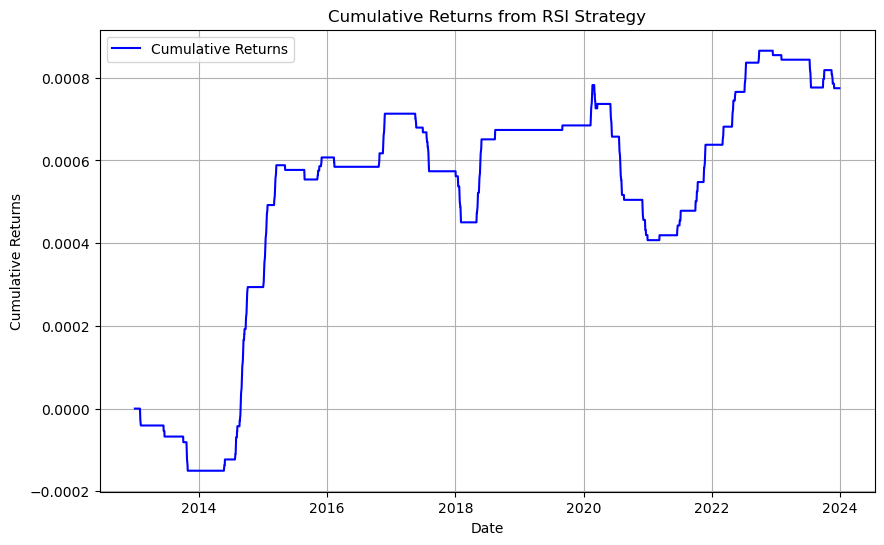

In [26]:
# Assuming you have a DataFrame 'df' with columns: 'Date', 'Close', and 'RSI'
# Define buy and sell signals based on RSI thresholds
df['Buy_Signal'] = (df['RSI'] < 30).astype(int)
df['Sell_Signal'] = (df['RSI'] > 70).astype(int)

# Calculate position based on signals (1 for buy, -1 for sell, 0 otherwise)
df['Position'] = df['Buy_Signal'] - df['Sell_Signal']

# Calculate portfolio value based on position and daily close price
initial_balance = 100000  # Initial account balance
df['Portfolio_Value'] = initial_balance + (df['Position'] * df['Close']).cumsum()

# Calculate cumulative returns
df['Cumulative_Returns'] = (df['Portfolio_Value'] / initial_balance) - 1

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Cumulative_Returns'], label='Cumulative Returns', color='b')
plt.title('Cumulative Returns from RSI Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

### Cumulative returns represent the overall profit or loss generated by a trading strategy over a specific period. #Cumulative Returns: The y-axis represents the cumulative returns of our trading strategy. The x-axis represents time (dates). The blue line shows how our portfolio value changes over time as we execute buy and sell signals based on RSI. Positive cumulative returns indicate profit, while negative cumulative returns indicate losses. Observations: The strategy appears to perform well during certain periods when RSI signals align with market conditions. There are upward trends where the strategy generates profits. However, there are also periods of drawdowns (losses) when the strategy underperforms. Considerations: The RSI strategy is sensitive to the chosen RSI thresholds (30 and 70). Adjusting these thresholds may impact performance. Transaction costs, slippage, and other real-world factors are not considered in this simplified backtest. Further analysis and optimization are needed to validate the strategy’s robustness. Risk Management: Risk management is crucial. Consider setting stop-loss levels and position sizing to limit losses. Diversification across multiple currency pairs can reduce risk. Conclusion: The RSI strategy shows potential, but it requires thorough testing and refinement. Backtesting is a starting point; live trading involves additional complexities.

# correlation between pairs

Correlation Coefficient between EUR/USD and GBP/USD: 0.7957963611871333
Correlation Coefficient between EUR/USD and USD/JPY: -0.6805004487947701
Correlation Coefficient between GBP/USD and USD/JPY: -0.472541360481213
EUR/USD and GBP/USD have the highest correlation.


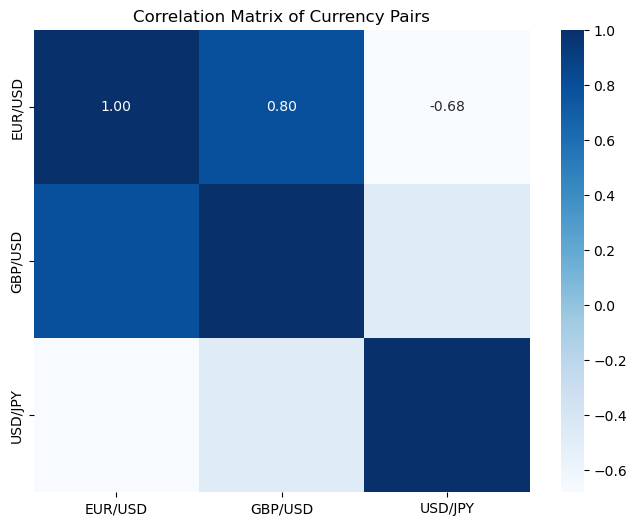

          EUR/USD   GBP/USD   USD/JPY
EUR/USD  1.000000  0.795796 -0.680500
GBP/USD  0.795796  1.000000 -0.472541
USD/JPY -0.680500 -0.472541  1.000000
Summary Conclusion:
-------------------------------
Correlation close to 1 indicates a strong positive correlation.
Correlation close to -1 indicates a strong negative correlation.
Correlation close to 0 indicates no linear correlation.
Use this information for diversification or to avoid overexposure to highly correlated assets.


In [27]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns


# Load historical forex data for different currency pairs
eurusd_df = pd.read_csv('EURUSD.csv')
gbpusd_df = pd.read_csv('GBPUSD.csv')
usdjpy_df = pd.read_csv('USDJPY.csv')

# Calculate correlation coefficients for each pair
correlation_eurusd_gbpusd, _ = pearsonr(eurusd_df['Close'], gbpusd_df['Close'])
correlation_eurusd_usdjpy, _ = pearsonr(eurusd_df['Close'], usdjpy_df['Close'])
correlation_gbpusd_usdjpy, _ = pearsonr(gbpusd_df['Close'], usdjpy_df['Close'])

# Print correlation coefficients
print("Correlation Coefficient between EUR/USD and GBP/USD:", correlation_eurusd_gbpusd)
print("Correlation Coefficient between EUR/USD and USD/JPY:", correlation_eurusd_usdjpy)
print("Correlation Coefficient between GBP/USD and USD/JPY:", correlation_gbpusd_usdjpy)

# Find the pair with the highest correlation
max_correlation = max(correlation_eurusd_gbpusd, correlation_eurusd_usdjpy, correlation_gbpusd_usdjpy)
if max_correlation == correlation_eurusd_gbpusd:
    print("EUR/USD and GBP/USD have the highest correlation.")
elif max_correlation == correlation_eurusd_usdjpy:
    print("EUR/USD and USD/JPY have the highest correlation.")
else:
    print("GBP/USD and USD/JPY have the highest correlation.")

# Assuming the CSV files have 'Date' and 'Close' columns, adjust accordingly if necessary
# Concatenate the 'Close' prices of each currency pair into a single DataFrame
df = pd.DataFrame({
    'EUR/USD': eurusd_df['Close'],
    'GBP/USD': gbpusd_df['Close'],
    'USD/JPY': usdjpy_df['Close']
})

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Currency Pairs')
plt.show()

print(correlation_matrix)

# Summary conclusion
print("Summary Conclusion:")
print("-------------------------------")
print("Correlation close to 1 indicates a strong positive correlation.")
print("Correlation close to -1 indicates a strong negative correlation.")
print("Correlation close to 0 indicates no linear correlation.")
print("Use this information for diversification or to avoid overexposure to highly correlated assets.")


#### Correlation Coefficient between EUR/USD and GBP/USD: 0.7957963611871333
Correlation Coefficient between EUR/USD and USD/JPY: -0.6805004487947701
Correlation Coefficient between GBP/USD and USD/JPY: -0.472541360481213
EUR/USD and GBP/USD have the highest correlation.
Given these correlation coefficients, it seems that EUR/USD and GBP/USD have the highest correlation among the pairs analyzed, as their correlation coefficient is the closest to 1 in absolute value. This suggests that movements in EUR/USD are more strongly correlated with movements in GBP/USD compared to the other pairs.


# Engle-Granger cointegration test

In [28]:
from statsmodels.tsa.stattools import coint

# Perform Engle-Granger cointegration test
cointegration_test = coint(eurusd_df['Close'],gbpusd_df['Close'])
print("Engle-Granger Cointegration Test p-value:", cointegration_test[1])


Engle-Granger Cointegration Test p-value: 0.46077748564408627


#### A p-value of 0.4608 from the Engle-Granger cointegration test indicates that we do not have sufficient evidence to reject the null hypothesis of no cointegration between EUR/USD and GBP/USD at conventional significance levels (e.g., α = 0.05). In other words, there is no strong evidence to suggest that there is a long-term relationship between these two currency pairs.¶

####  Understanding cointegration between different pairs helps traders manage risk by diversifying their trading strategies across multiple assets that exhibit stable long-term relationships. This can reduce the impact of adverse market movements on the portfolio.
#### Overall, exploring cointegration between different pairs offers traders opportunities for diversification, arbitrage, market insights, and the development of robust trading strategies. It enhances risk management and can lead to more profitable trading decisions.








# Regression

In [29]:
import statsmodels.api as sm

# Prepare data for regression analysis
X = gbpusd_df['Close']
y = eurusd_df['Close']
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     4944.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:09:45   Log-Likelihood:                 4133.2
No. Observations:                2865   AIC:                            -8262.
Df Residuals:                    2863   BIC:                            -8250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4342      0.010     41.808      0.0

# ARIMA MODEL

In [30]:
df.columns

Index(['EUR/USD', 'GBP/USD', 'USD/JPY'], dtype='object')

In [33]:
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('EURUSD.csv')
# ADF test
adf_result = adfuller(df['Close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])


ADF Statistic: -1.8434492634781485
p-value: 0.35911351508420375


###  based on the given p-value, the time series is likely non-stationary.

In [34]:
# Differencing
df['Close_diff'] = df['Close'] - df['Close'].shift(1)
data.dropna(inplace=True)


In [35]:
time_series = df['Close']
time_series

0       1.320132
1       1.319784
2       1.318218
3       1.303271
4       1.306745
          ...   
2860    1.102657
2861    1.102026
2862    1.104301
2863    1.110864
2864    1.106819
Name: Close, Length: 2865, dtype: float64

In [36]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

log_transformed_series = time_series.apply(lambda x: max(0, x)).apply(lambda x: x + 1).apply(np.log)
differenced_series = log_transformed_series.diff().dropna()  # First-order differencing
seasonal_difference = differenced_series.diff(12).dropna()  # Seasonal differencing with lag of 12

# Perform the ADF test
adf_result = adfuller(seasonal_difference)

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
print("Is the time series stationary?", "No" if adf_result[1] > 0.05 else "Yes")


ADF Statistic: -16.95532174252706
p-value: 9.39502126333555e-30
Critical Values: {'1%': -3.4326669033274806, '5%': -2.86256364735512, '10%': -2.5673149183491266}
Is the time series stationary? Yes


In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Close'], order=(1, 0, 1))  # Replace p, d, q with appropriate values
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2865
Model:                 ARIMA(1, 0, 1)   Log Likelihood               10731.131
Date:                Thu, 18 Jul 2024   AIC                         -21454.261
Time:                        12:17:52   BIC                         -21430.420
Sample:                             0   HQIC                        -21445.665
                               - 2865                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1606      0.035     33.148      0.000       1.092       1.229
ar.L1          0.9979      0.001   1030.947      0.000       0.996       1.000
ma.L1         -0.0381      0.015     -2.460      0.0

In [39]:
# Forecast
forecast = result.forecast(steps=len(data))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(df['Close'], forecast))
print('RMSE:', rmse)



RMSE: 0.10443793238397815


In [40]:
# Calculate residuals
residuals = df['Close'] - result.fittedvalues

# Calculate total sum of squares (TSS)
TSS = ((df['Close'] - df['Close'].mean()) ** 2).sum()

# Calculate residual sum of squares (RSS)
RSS = (residuals ** 2).sum()

# Calculate R^2
R_squared = 1 - (RSS / TSS)

print("R^2:", R_squared)


R^2: 0.9953500768224379


In [41]:
# Print actual values
print("Actual Close Prices:")
print(df['Close'])

# Print predicted values
print("\nPredicted Close Prices:")
print(result.fittedvalues)


Actual Close Prices:
0       1.320132
1       1.319784
2       1.318218
3       1.303271
4       1.306745
          ...   
2860    1.102657
2861    1.102026
2862    1.104301
2863    1.110864
2864    1.106819
Name: Close, Length: 2865, dtype: float64

Predicted Close Prices:
0       1.160560
1       1.319765
2       1.319444
3       1.317929
4       1.303526
          ...   
2860    1.100526
2861    1.102699
2862    1.102176
2863    1.104340
2864    1.110721
Length: 2865, dtype: float64


In [42]:
import pandas as pd

# Create DataFrame for actual and predicted values
actual_predicted_df = pd.DataFrame({'Actual': df['Close'], 'Predicted': result.fittedvalues})

# Print the DataFrame
print(actual_predicted_df)


        Actual  Predicted
0     1.320132   1.160560
1     1.319784   1.319765
2     1.318218   1.319444
3     1.303271   1.317929
4     1.306745   1.303526
...        ...        ...
2860  1.102657   1.100526
2861  1.102026   1.102699
2862  1.104301   1.102176
2863  1.110864   1.104340
2864  1.106819   1.110721

[2865 rows x 2 columns]


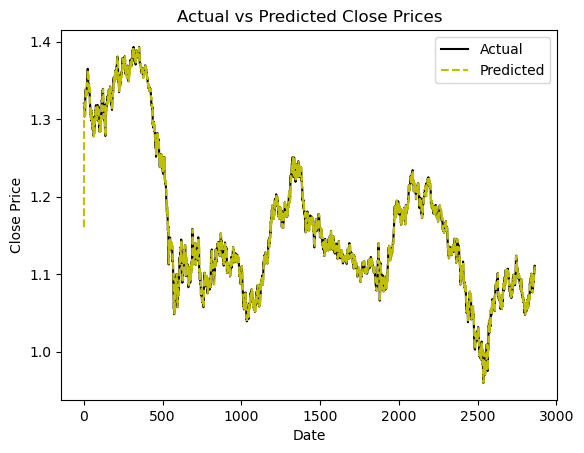

In [43]:
import matplotlib.pyplot as plt

# Plot actual and predicted values
plt.plot(actual_predicted_df.index, actual_predicted_df['Actual'], color='black',label='Actual')
plt.plot(actual_predicted_df.index, actual_predicted_df['Predicted'], color='y', linestyle='dashed', label='Predicted')

# Add title and labels
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Add legend
plt.legend()

# Show plot
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_predicted_df['Actual'], actual_predicted_df['Predicted'])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_predicted_df['Actual'], actual_predicted_df['Predicted'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R^2 score
r_squared = r2_score(actual_predicted_df['Actual'], actual_predicted_df['Predicted'])

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r_squared)


Mean Absolute Error (MAE): 0.004304504307380665
Mean Squared Error (MSE): 4.145497974781243e-05
Root Mean Squared Error (RMSE): 0.006438554165945366
R^2 Score: 0.9953500768224379


# SVM MODEL

In [45]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your FX trading data into a DataFrame (assuming it's in CSV format)
data = pd.read_csv("EURUSD.csv")

# Assuming you have 'Close' as your target variable and 'Open', 'High', 'Low', 'Volume' as features
# You might need to perform feature engineering to include moving averages, technical indicators, etc.

# Split data into features (X) and target variable (y)
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVR(kernel='linear')  # You can choose different kernels based on your data
svm_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)


Mean Absolute Error (MAE): 0.03699442274235303
Mean Squared Error (MSE): 0.0020289790407974646
Root Mean Squared Error (RMSE): 0.045044189867256626
R-squared (R2): 0.7845788804282448


### These metrics indicate how well your Support Vector Machine (SVM) model performed on the test data. The R-squared value of 0.7846 suggests that approximately 78.46% of the variance in the target variable (Close price) can be explained by the features included in your model. Additionally, the MAE, MSE, and RMSE values provide insight into the average prediction error and the dispersion of errors in your model's predictions. Overall, these metrics indicate a reasonably good performance of your SVM model on the FX trading data.

# Random Forest

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv("EURUSD.csv")

# Check the data types and non-numeric values
print(data.dtypes)

# If 'EURUSD=X' is a column with non-numeric values, you can drop it
data.drop(columns=['Pair'], inplace=True)

# Split data into features (X) and target variable (y)
X = data.drop(columns=["Close"])
y = data["Close"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Pair          object
dtype: object
Mean Squared Error: 1.0387007159083639e-07
R-squared: 0.9999889718884907


In [47]:
import numpy as np

# Assuming y_test and y_pred are your actual and predicted values, respectively

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.00014975187562108125
Root Mean Squared Error (RMSE): 0.0003222888015287475
